The reuter data is encoded as a vector of indices. The actual words can be retrieved from a dictionary.

In [1]:
def reverse(data):
    return dict([(value, key) for (key, value) in data.items()])

def decode_review(word_index, data, index):
    return ' '.join([word_index.get(i - 3, '?') for i in data[index]])

def get_review(imdb, data, index):
    reverse_word_index = reverse(imdb.get_word_index())
    return decode_review(reverse_word_index, data, index)

We can not give a (random length) list of integers to the neural network. So we have to transform them into Tensors of same length. If we have 10.000 words, a list of [5, 13, 42] (pointing to the words at these index) would transform into a vector with size of 10.000 which contains only Zeros except at the index of 5, 13 and 42 where it contains 1. This is called a One-hot encoding.

In [2]:
import numpy as np

def one_hot_encoding(sequences, dimension):
    results = np.zeros(shape=(len(sequences), dimension), dtype=float)
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

In [6]:
from keras import models
from keras import layers

def build_model():
    model =  models.Sequential()
    model.add(layers.Dense(64, activation='relu',  input_shape=(_NUM_WORDS,)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(46, activation='softmax'))

    model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# find the correct num of epochs before applying model to test_data
def validate(train_data, train_labels, test_data, test_labels):
    # From the 8982 samples we wanna use 1.000 as validation data
    NUM_VALIDATION = 1000
    validation_train_data = train_data[:NUM_VALIDATION]
    partial_train_data = train_data[NUM_VALIDATION:]

    validation_train_labels = train_labels[:NUM_VALIDATION]
    partial_train_labels = train_labels[NUM_VALIDATION:]

    model = build_model()

    history = model.fit(partial_train_data, partial_train_labels, 
                        epochs=20, batch_size=512, verbose=0,
                        validation_data=(validation_train_data, validation_train_labels))
    return history

def test(train_data, train_labels, test_data, test_labels):
    model = build_model()
    model.fit(train_data, train_labels, epochs=9, batch_size=512, verbose=0)

    print("results: ", model.evaluate(test_data, test_labels))
    #print("prediction for each test sample: ",model.predict(test_data)[0])

In [4]:
import matplotlib.pyplot as plt

def plot(history):
    plot_loss_result(history)
    plot_accuracy_result(history)
    
def plot_loss_result(history):
    history_dict = history.history
    loss_values = history_dict['loss']
    validation_loss_values = history_dict['val_loss']
    epochs = range(1, len(loss_values) + 1)
    
    plt.figure()
    plt.plot(epochs, loss_values, 'bo', label="Loss Training")
    plt.plot(epochs, validation_loss_values, 'b', label='Loss Validation')
    plt.title('Loss function results')
    plt.xlabel('Epochs')
    plt.ylabel('Value loss function')
    plt.legend()
    
def plot_accuracy_result(history):
    history_dict = history.history
    acc_values = history_dict['acc']  
    validation_acc_values = history_dict['val_acc']
    epochs = range(1, len(acc_values) + 1)

    plt.figure()
    plt.plot(epochs, acc_values, 'bo', label='Accuracy Traning')
    plt.plot(epochs, validation_acc_values, 'b', label='Accuracy Validation')
    plt.title('Accuracy Results')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy value')
    plt.legend()

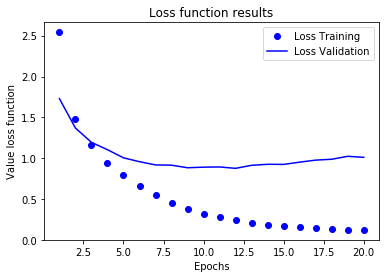

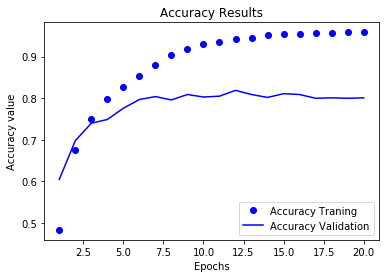

In [7]:
from keras.datasets import reuters
from keras.utils.np_utils import to_categorical

_NUM_WORDS = 5000

(train_data, train_labels), (test_data, test_labels) =  reuters.load_data(num_words=_NUM_WORDS)

binary_train_data = one_hot_encoding(train_data, _NUM_WORDS)
binary_test_data = one_hot_encoding(test_data, _NUM_WORDS)

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

history = validate(binary_train_data, one_hot_train_labels, binary_test_data, one_hot_test_labels)
plot(history)

# test(binary_train_data, one_hot_train_labels, binary_test_data, one_hot_test_labels)